<a href="https://colab.research.google.com/github/BilitisPrudhomme/BilitisPrudhomme/blob/main/Coding_EMF_project_RevFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# pip is the standard package manager for Python. It allows you to install and manage additional packages that are not part of the Python standard library.
!pip install --upgrade gspread

  Found existing installation: gspread 3.0.1
    Uninstalling gspread-3.0.1:
      Successfully uninstalled gspread-3.0.1


**INSTALLATION DES LIBRAIRIES**

In [5]:
#Colab is a Python development environment that runs in the browser using Google Cloud, in order to use the Drive API, we must first authenticate and construct an API client.
from google.colab import auth
auth.authenticate_user()

# Use the open-source gspread library for interacting with Google Sheets.
import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())


In [6]:
# Simply imports the library the current namespace, but rather than using the name pandas , it's instructed to use the name pd instead. This is just so you can do pd.whatever instead of having to type out pandas, samething for matplotlib.
# Pandas library. pandas is an open source Python library that provides “high-performance, easy-to-use data structures and data analysis tools.”
# Matplotlib is a Python package used for data plotting and visualisation. It is a useful complement to Pandas, and like Pandas, is a very feature-rich library which can produce a large variety of plots, charts, maps, and other visualisations.
import pandas as pd

In [7]:
#Executing the cell above, gspread will interact with the google sheets i choose.
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1__ZgEvVfi1h5CSKOZ6zTrQyEvGdHxXFeArn_Ej2jy4Y/edit#gid=1298731864')

In [8]:
#Executing this cell above, gspread will interact with the worksheet with data i need.
sheet = wb.worksheet('Appendix A. Primary Standard Occupational Classifications (SOC)')

In [9]:
#Getting All Values From a Row or a Column
data = sheet.get_all_values()



In [10]:
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.iloc[1:]


In [11]:
#afficher les 538 lignes du jeu de données
df.head(538)

,Description,SOC,SOC DIVISION,Subjects,AM (uT),SD (uT),GM (uT),GSD,Data Type
1,legislators,1110,"Executive, Administrative, and Managerial Occu...",15,0.180,0.061,0.039,1.39,Inferred
2,chief executives and general administrators,1120,"Executive, Administrative, and Managerial Occu...",15,0.180,0.063,0.039,1.40,Raw
3,"judicial, public safety and corrections admini...",1131,"Executive, Administrative, and Managerial Occu...",15,0.180,0.061,0.039,1.39,Inferred
4,human resources program administrators,1132,"Executive, Administrative, and Managerial Occu...",15,0.180,0.061,0.039,1.39,Inferred
5,natural resources program administrators,1133,"Executive, Administrative, and Managerial Occu...",15,0.180,0.061,0.039,1.39,Inferred
...,...,...,...,...,...,...,...,...,...
534,garage and service station related occupations,8730,"Handlers, Equipment Cleaners, Helpers, and Lab...",6,0.236,0.123,0.146,1.68,Raw
535,parking lot attendants,8740,"Handlers, Equipment Cleaners, Helpers, and Lab...",6,0.236,0.112,0.146,1.60,Inferred
536,hand packers and packagers,8761,"Handlers, Equipment Cleaners, Helpers, and Lab...",5,0.363,0.235,0.499,1.94,Raw
537,"manual occupations, not elsewhere classified",8769,"Handlers, Equipment Cleaners, Helpers, and Lab...",5,0.360,0.433,1.879,2.58,Raw


In [12]:
#dimensions : nombre de lignes, nombre de colonnes
#la ligne d'en-tête n'est pas comptabilisée
#dans le nombre de lignes
print(df.shape)

(538, 9)


**NETTOYAGE DE DONNÉES**


In [13]:
#Quels sont les types de données attendus (int, float, string, boolean)?
df['Description'] = df['Description'].astype(str)
df['SOC'] = df['SOC'].astype(str)
df['SOC DIVISION'] = df['SOC DIVISION'].astype(str)
df['Subjects'] = df['Subjects'].astype(int)
df['AM (uT)'] = df['AM (uT)'].astype(float)
df['SD (uT)'] = df['SD (uT)'].astype(float)
df['GM (uT)'] = df['GM (uT)'].astype(float)
df['GSD'] = df['GSD'].astype(float)
df['Data Type'] = df['Data Type'].astype(str)

In [14]:
#Quelles sont les caractéristiques?
#énumération des colonnes
print(df.columns)
#type de chaque colonne
print(df.dtypes)


Index(['Description', 'SOC', 'SOC DIVISION', 'Subjects', 'AM (uT)', 'SD (uT)',
       'GM (uT)', 'GSD', 'Data Type'],
      dtype='object', name=0)
0
Description      object
SOC              object
SOC DIVISION     object
Subjects          int64
AM (uT)         float64
SD (uT)         float64
GM (uT)         float64
GSD             float64
Data Type        object
dtype: object


In [15]:
#Y a-t-il des valeurs manquantes évidentes (valeurs que la bibliothèque pandas peut détecter) via informations sur les données
# Affichage de la colonne ST_NUM
print(df['SOC DIVISION'])# Affichage des valeurs nulles
print(df['SOC DIVISION'].isnull())
#informations sur les données
df.info()

1      Executive, Administrative, and Managerial Occu...
2      Executive, Administrative, and Managerial Occu...
3      Executive, Administrative, and Managerial Occu...
4      Executive, Administrative, and Managerial Occu...
5      Executive, Administrative, and Managerial Occu...
                             ...                        
534    Handlers, Equipment Cleaners, Helpers, and Lab...
535    Handlers, Equipment Cleaners, Helpers, and Lab...
536    Handlers, Equipment Cleaners, Helpers, and Lab...
537    Handlers, Equipment Cleaners, Helpers, and Lab...
538                                 Military Occupations
Name: SOC DIVISION, Length: 538, dtype: object
1      False
2      False
3      False
4      False
5      False
       ...  
534    False
535    False
536    False
537    False
538    False
Name: SOC DIVISION, Length: 538, dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 1 to 538
Data columns (total 9 columns):
 #   Column        Non-Null Count 

**MANIPULATIONS DE DONNÉES**

In [16]:
#Quelles sont les divisions SOC (Classification professionnelle standard), et combien y en a-t-il d'occupations dans chaque division?
#comptage des valeurs
print(df['SOC DIVISION'].value_counts())

Production Working Occupations                                                       75
Administrative Support Occupations, Including Clerical                               58
Executive, Administrative, and Managerial Occupations                                43
Marketing and Sales Occupations                                                      42
Service Occupations                                                                  36
Teachers, Librarians and Counselors                                                  36
Precision Production Occupations                                                     31
Construction and Extractive Occupations                                              29
Mechanics and Repairers                                                              27
Handlers, Equipment Cleaners, Helpers, and Laborers                                  27
Agricultural, Forestry, and Fishing Occupations                                      23
Engineers, Surveyors, and Archit

In [17]:
# imprime le nom de la colonne
for x in df:
  print(x) 

Description
SOC
SOC DIVISION
Subjects
AM (uT)
SD (uT)
GM (uT)
GSD
Data Type


In [21]:
#accès à une colonne
print(df['Data Type'])

1      Inferred
2           Raw
3      Inferred
4      Inferred
5      Inferred
         ...   
534         Raw
535    Inferred
536         Raw
537         Raw
538         Raw
Name: Data Type, Length: 538, dtype: object


In [22]:
#un type Series est un vecteur, il est possible d'utiliser des indices
#3 premières valeurs
print(df['SOC DIVISION'][0:3])

1    Executive, Administrative, and Managerial Occu...
2    Executive, Administrative, and Managerial Occu...
3    Executive, Administrative, and Managerial Occu...
Name: SOC DIVISION, dtype: object


In [23]:
#trier les valeurs d'une variable de manière croissante
print(df['GM (uT)'].sort_values())

89        0.000
243       0.000
241       0.000
238       0.000
236       0.000
         ...   
391     211.083
382     211.083
383     211.083
331     593.403
371    1147.146
Name: GM (uT), Length: 538, dtype: float64


**IF CONDITION**

In [24]:
#Accès au ligne selon une condition
df[df['GM (uT)'] > 500]

,Description,SOC,SOC DIVISION,Subjects,AM (uT),SD (uT),GM (uT),GSD,Data Type
331,timber cutting and related occupations,5730,"Agricultural, Forestry, and Fishing Occupations",9,2.480,7.703,593.403,4.66,Raw
371,electrical power installers and repairers,6433,Construction and Extractive Occupations,156,3.474,10.731,1147.146,4.34,Raw


**VISUALISATION avec API MATPLOTLIB:CRÉER DEUX FIGURES**  
Quelles est la proportion de données mesurées vs inférées? Comment mes données sont-elles distribuées ? Mon jeu de données contient-ils des points aberrants ? Quelles sont les variations dans la dispersion de plusieurs séries au sein du jeu de données ?

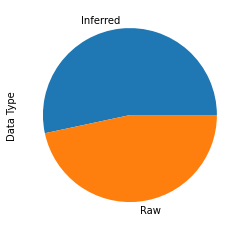

In [27]:
import matplotlib.pyplot as plt
import numpy as np
#diagramme à secteurs - Visualiser la proportion des occupations par types de données: mesurées versus inferrées
df['Data Type'].value_counts().plot.pie()

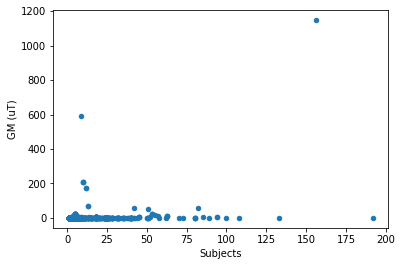

In [43]:
#scatterplot : Subjects vs. GN (uT)
df.plot.scatter(x='Subjects',y='GM (uT)')

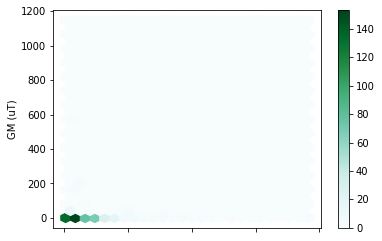

In [59]:
#grille à la carte de Kohonen - permet de voir la densité des points ici
df.plot.hexbin(x='Subjects',y='GM (uT)',gridsize=25)

**STATISTIQUES**

**1) Générer des statistiques descriptives**
**Variables numériques**

*Les indicateurs statistiques choisis ne sont valables que pour les variables numérique donc j'ai exclus toutes les collonnes ayant des données de type objet

**A.Mesures de tendance centrale: médiane, moyenne**                            


**B.Mesures de dispersion: étendue (max - min), écart interquartile, écart-type**

In [44]:
#description des données de toutes les colonnes saufs celles exclues
print(df.describe(exclude='object'))

0        Subjects     AM (uT)     SD (uT)      GM (uT)         GSD
count  538.000000  538.000000  538.000000   538.000000  538.000000
mean    16.769517    0.275225    0.305770     6.868658    1.932546
std     20.286928    0.324072    0.769217    58.907171    0.705455
min      1.000000    0.049000    0.000000     0.000000    1.000000
25%      4.250000    0.131250    0.060000     0.013000    1.490000
50%      9.000000    0.200000    0.112500     0.075000    1.790000
75%     24.000000    0.270000    0.268000     0.726000    2.240000
max    192.000000    3.474000   10.731000  1147.146000    5.150000


In [45]:
#statistique descriptive pour une seule colonne
print(df['GM (uT)'].describe())

count     538.000000
mean        6.868658
std        58.907171
min         0.000000
25%         0.013000
50%         0.075000
75%         0.726000
max      1147.146000
Name: GM (uT), dtype: float64


In [46]:
#statistique descriptive pour une seule colonne
print(df['AM (uT)'].describe())

count    538.000000
mean       0.275225
std        0.324072
min        0.049000
25%        0.131250
50%        0.200000
75%        0.270000
max        3.474000
Name: AM (uT), dtype: float64


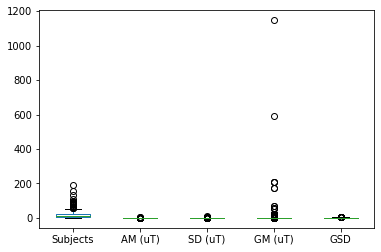

In [30]:
#comparaison des distributions avec un boxplot de toutes les colonnes avec variable continues et discontinues
df.plot(kind='box')

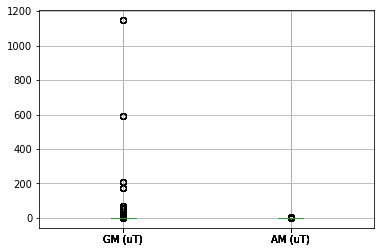

In [53]:
#comparaison des distributions avec un boxplot des moyennes arithmétiques et géométriques pour les  champs magnétiques moyen pondéré dans le temps.
for column in df:
    boxplot = df.boxplot(column=['GM (uT)', 'AM (uT)'])
  

**2) Générer des statistiques descriptives Variables Catégorielles**

**Visualiser la distribution: graphique à barres.**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f00aa0bdf10>,
      dtype=object)

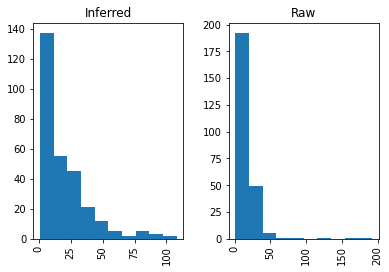

In [52]:
 #histogrammes de l'âge selon le Data Type
df.hist(column='Subjects',by='Data Type')

**Variable nominale: Comme tendance centrale, on peut seulement définir le mode (valeur la plus commune)**.

**Variable ordinale: Puisque les catégories sont ordonnées, on peut aussi définir la valeur médiane.**

**Relation entre deux variables numériques, entre la AM(uT) et la GM (uT)**



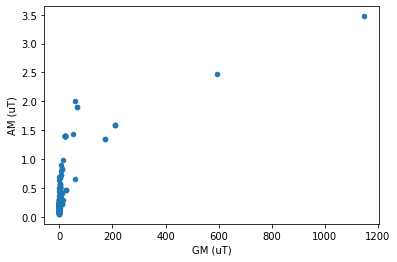

In [54]:
#scatterplot : AM (uT) vs. GM (uT)
df.plot.scatter(x='GM (uT)',y='AM (uT)')

**Covariance et corrélation**

**ÉCHANTILLONNAGE**
Le lien entre la taille de l'échantillon et la confiance que l'on peut accorder à la généralisation des résultats. Dans toutes les enquêtes quantitatives, la taille de l’échantillon est un facteur déterminant pour obtenir des données fiables

In [60]:
#Pingouin for the correlation analysis
import numpy as np
import pingouin as pg

ModuleNotFoundError: ignored